In [1]:
import wandb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_style('dark')
from collections import defaultdict
import helper
import os

In [2]:
api = wandb.Api(timeout=40)
runs = api.runs("structurelearning/BIOLS")
max_steps = 20000
reqd_keys = ['Evaluations/SHD', 'Evaluations/AUROC', 'L_MSE']

In [19]:
def get_plot_dataframe(data_folders, runs, reqd_keys, num_interv):
    plot_data_dict = defaultdict(lambda: [])

    for data_folder in data_folders:
        exp_config = {'biols_data_folder': data_folder}
        exp_run = helper.get_reqd_runs(exp_config, runs, num_seeds=5)
        plotting_data = helper.get_plotting_data(exp_run, reqd_keys)

        splits = data_folder.split('-')
        exp_edges = int(splits[0][-1])
        proj = splits[2][:-4]
        if proj == '3_layer_mlp':   proj = 'nonlinear'
        d = int(splits[3][1:])
        D = int(splits[4][1:])
        num_intervs = int(splits[6][7:])
        interv_sets = int(splits[7][4:])

        for key in reqd_keys:
            num_seeds = len(plotting_data[key][:, -1])
            lhs_key = key
            if 'SHD' in key:        lhs_key = 'SHD'
            elif 'AUROC' in key:    lhs_key = 'AUROC'
            plot_data_dict[lhs_key] += (plotting_data[key][:, -1]).tolist()
        
        rstring = r"$ER-{}, d={}, D={}\ $".format(exp_edges, d, D)
        plot_data_dict['Graph density'] += [rstring] * num_seeds
        plot_data_dict['Nodes'] += [d] * num_seeds
        plot_data_dict['Interventional Sets'] += [f'Intervention sets: {interv_sets}'] * num_seeds
        plot_data_dict['Model'] += ['BIOLS'] * num_seeds
        plot_data_dict['biols_data_folder'] += [exp_config['biols_data_folder']] * num_seeds

    plot_df = pd.DataFrame(plot_data_dict)
    name = f'er{exp_edges}_proj{proj}_sets{num_interv}'
    return plot_df, name

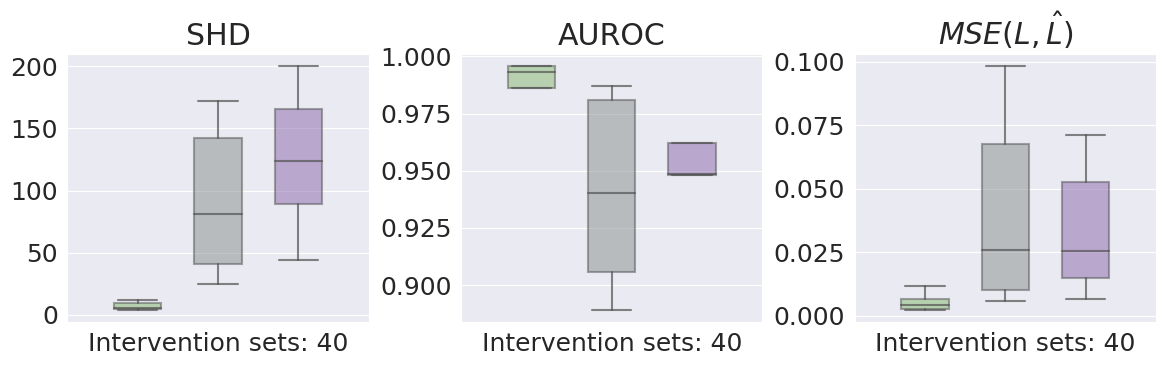

In [26]:
num_nodes_list = [20, 30, 40]
num_interv = 4000
data_folders = []

for num_nodes in num_nodes_list:
    zfilled_nodes = str(num_nodes).zfill(3)
    datafolder = f'er1-ws_datagen_fix_noise_interv_noise-linearproj-d{zfilled_nodes}-D0100-multi-n_pairs{num_interv}-sets{int(num_interv/100)}-gaussianinterv'
    data_folders.append(datafolder)

plot_df, name = get_plot_dataframe(data_folders, runs, reqd_keys, num_interv)

plot_scaling_nodes_ablation(
    plot_df,
    '/home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/scaling_nodes', 
    name, 
    reqd_keys, 
    fontsize=18, 
    num_nodes_list=num_nodes_list, 
    title=None, 
    box_widths=0.6
)

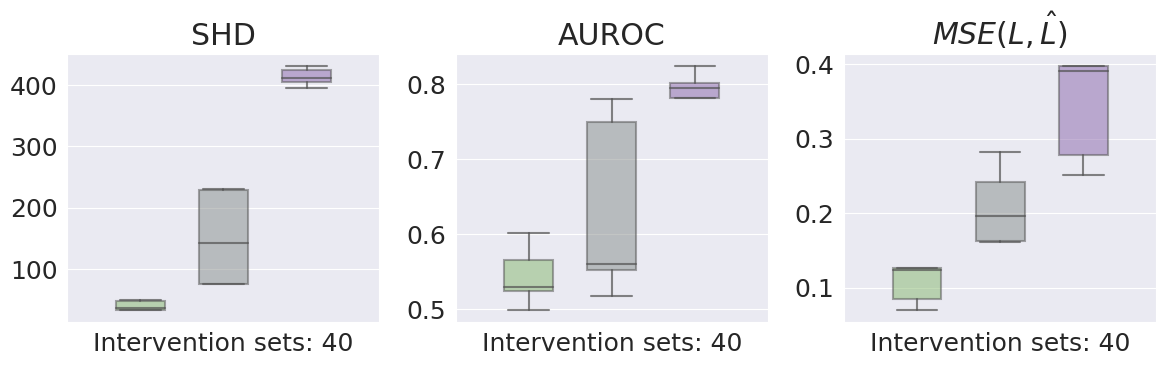

In [27]:
num_nodes_list = [20, 30, 40]
num_interv = 4000
data_folders = []

for num_nodes in num_nodes_list:
    zfilled_nodes = str(num_nodes).zfill(3)
    datafolder = f'er1-ws_datagen_fix_noise_interv_noise-linearproj-d{zfilled_nodes}-D0100-single-n_pairs{num_interv}-sets{int(num_interv/100)}-gaussianinterv'
    data_folders.append(datafolder)

plot_df, name = get_plot_dataframe(data_folders, runs, reqd_keys, num_interv)

plot_scaling_nodes_ablation(
    plot_df,
    '/home/mila/j/jithendaraa.subramanian/scratch/biols_datasets/scaling_nodes', 
    name, 
    reqd_keys, 
    fontsize=18, 
    num_nodes_list=num_nodes_list, 
    title=None, 
    box_widths=0.6
)